In [1]:
import numpy as np
import random
from gurobipy import Model, GRB, quicksum, QuadExpr, LinExpr
import matplotlib.pyplot as plt

# Number of assets
n = 8

# replace d1 with the second-to-last digit of your registration number
# replace d2 with the last digit of your registration number
d1 = 1
d2 = 4

dummystep = 10*d1+d2
for _ in range(dummystep):
    dummy = random.uniform(0,1)

Corr = np.array([[0]*n for _ in range(n)], dtype = float)

for i in range(n):
    for j in range(n):
        Corr[i][j] = (-1)**abs(i-j)/(abs(i-j)+1)
    
ssigma = np.array([[0]*1 for _ in range(n)], dtype = float)

# mmu is the vector μ in the assignment
mmu = np.array([[0]*1 for _ in range(n)], dtype = float)
ssigma[0] = 2
mmu[0] = 3

for i in range(n-1):
    ssigma[i+1] = ssigma[i] + 2*random.uniform(0,1)
    mmu[i+1] = mmu[i] + 1

ddiag = np.array([[0]*n for _ in range(n)], dtype = float)

np.fill_diagonal(ddiag, ssigma)

C2 = np.matmul(np.matmul(ddiag,Corr), ddiag)

# C is the matrix C in the assignment
C = 0.5*(C2 + C2.T)

r_values = np.arange(3.00, 9.25, 0.25)

mu = mmu

In [2]:
# Task 1
# Store results here
optml_1 = []
mean_1 = []  # Means of solutions
std_1 = []  # Standard deviations of solutions

# Track the minimum risk portfolio
minrsk_vol1 = None
minrsk_ret1 = None

# Number of variables (assuming C is a square matrix)
#n = len(C)
n = 8

# Create a Gurobi model
mdl = Model("QuadraticOptimization")
mdl.setParam('OutputFlag', 0)

# Add variables to the model
x = mdl.addVars(n, lb=0, name="x")

# Set the objective: Minimize x^T C x
min_obj = QuadExpr()
for i in range(n):
    for j in range(n):
        min_obj += x[i] * C[i][j] * x[j]
mdl.setObjective(min_obj, GRB.MINIMIZE)

# Add constraint: e^T x = 1
mdl.addConstr(sum(x[i] for i in range(n)) == 1, "sum_constraint")

# Solve for efficient frontier by varying target return
efficient_frontier1 = np.empty((2,0))

# Solve the model for each r value
for r in r_values:
    # Update the constraint: mu x = r
    try:
        mdl.remove(mdl.getConstrByName("r_constraint") if mdl.getConstrByName("r_constraint") else None)
    except:
        print("Skip")
    mdl.addConstr(LinExpr(mu, [x[i] for i in range(n)]) == r, "r_constraint")
    
    # Optimize the model
    mdl.optimize()
    
    # Check the solution status
    if mdl.status == GRB.OPTIMAL:
        xs = [v.x for v in mdl.getVars()]
        mean_1.append(np.mean(xs))
        std_1.append(np.std(xs))
        volty = np.sqrt(mdl.ObjVal)        
        efficient_frontier1 = np.append(efficient_frontier1, [[np.sqrt(mdl.ObjVal)],[r]], axis=1)
        
        # Update minimum risk portfolio if it's the lowest volatility so far
        if minrsk_vol1 is None or volty < minrsk_vol1:
            minrsk_vol1 = volty
            minrsk_ret1 = r

Restricted license - for non-production use only - expires 2025-11-24
Skip


C:\Users\sande\AppData\Local\Temp\ipykernel_9904\3530550424.py:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mdl.addConstr(LinExpr(mu, [x[i] for i in range(n)]) == r, "r_constraint")


In [3]:
# Task 2
# Store results here
optml_2 = []
mean_2 = []  # Means of solutions
std_2 = []  # Standard deviations of solutions

# Track the minimum risk portfolio
minrsk_vol2 = None
minrsk_ret2 = None

# Number of variables (assuming C is a square matrix)
#n = len(C)
n = 8

# Create a Gurobi model
mdl = Model("QuadraticOptimization")
mdl.setParam('OutputFlag', 0)

# Add variables to the model
x = mdl.addVars(n, lb=0, name="x")

# Set the objective: Minimize x^T C x
min_obj = QuadExpr()
for i in range(n):
    for j in range(n):
        min_obj += x[i] * C[i][j] * x[j]
mdl.setObjective(min_obj, GRB.MINIMIZE)

# Add constraint: e^T x = 1
mdl.addConstr(sum(x[i] for i in range(n)) <= 1, "investment_constraint")

# Solve for efficient frontier by varying target return
efficient_frontier2 = np.empty((2,0))

# Solve the model for each r value
for r in r_values:
    # Update the constraint: mu x = r
    try:
        mdl.remove(mdl.getConstrByName("r_constraint") if mdl.getConstrByName("r_constraint") else None)
    except:
        print("Skip")
    mdl.addConstr(LinExpr(mu, [x[i] for i in range(n)]) == r, "r_constraint")
    
    # Optimize the model
    mdl.optimize()
    
    # Check the solution status
    if mdl.status == GRB.OPTIMAL:
        xs = [v.x for v in mdl.getVars()]
        mean_2.append(np.mean(xs))
        std_2.append(np.std(xs))
        volty = np.sqrt(mdl.ObjVal)        
        efficient_frontier2 = np.append(efficient_frontier2, [[np.sqrt(mdl.ObjVal)],[r]], axis=1)
        
        # Update minimum risk portfolio if it's the lowest volatility so far
        if minrsk_vol2 is None or volty < minrsk_vol2:
            minrsk_vol2 = volty
            minrsk_ret2 = r

Skip


C:\Users\sande\AppData\Local\Temp\ipykernel_9904\3480104095.py:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mdl.addConstr(LinExpr(mu, [x[i] for i in range(n)]) == r, "r_constraint")


In [4]:
# Task 3
# Store results here
optml_3 = []
mean_3 = []  # Means of solutions
std_3 = []  # Standard deviations of solutions

# Track the minimum risk portfolio
minrsk_vol3 = None
minrsk_ret3 = None

# Initialize a variable to keep track of the r_constraint outside the loop
r_constraint = None

# Number of variables (assuming C is a square matrix)
#n = len(C)
n = 8

# Create a Gurobi model
mdl = Model("QuadraticOptimization")
mdl.setParam('OutputFlag', 0)

# Add variables to the model
x = mdl.addVars(n, lb=0, name="x")

# Set the objective: Minimize x^T C x
min_obj = QuadExpr()
for i in range(n):
    for j in range(n):
        min_obj += x[i] * C[i][j] * x[j]
mdl.setObjective(min_obj, GRB.MINIMIZE)

# Add constraint: e^T x = 1
mdl.addConstr(sum(x[i] for i in range(n)) == 1, "sum_constraint")

# Solve for efficient frontier by varying target return
efficient_frontier3 = np.empty((2,0))

# Solve the model for each r value
for r in r_values:
    if r_constraint is not None:
        mdl.remove(r_constraint)
        mdl.update()  # Ensure the model is updated after removing a constraint

    # Add the new constraint and keep a reference to it
    r_constraint = mdl.addConstr(LinExpr(mu, [x[i] for i in range(n)]) >= r, name="r_constraint")
    
    # Optimize the model
    mdl.optimize()
    
    # Check the solution status
    if mdl.status == GRB.OPTIMAL:
        xs = [v.x for v in mdl.getVars()]
        mean_3.append(np.mean(xs))
        std_3.append(np.std(xs))
        volty = np.sqrt(mdl.ObjVal)        
        efficient_frontier3 = np.append(efficient_frontier3, [[np.sqrt(mdl.ObjVal)],[r]], axis=1)
        
        # Update minimum risk portfolio if it's the lowest volatility so far
        if minrsk_vol3 is None or volty < minrsk_vol3:
            minrsk_vol3 = volty
            minrsk_ret3 = r

C:\Users\sande\AppData\Local\Temp\ipykernel_9904\2479538185.py:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  r_constraint = mdl.addConstr(LinExpr(mu, [x[i] for i in range(n)]) >= r, name="r_constraint")


In [5]:
# Task 4
# Store results here
optml_4 = []
mean_4 = []  # Means of solutions
std_4 = []  # Standard deviations of solutions

# Track the minimum risk portfolio
minrsk_vol4 = None
minrsk_ret4 = None

# Number of variables (assuming C is a square matrix)
#n = len(C)
n = 8

# Create a Gurobi model
mdl = Model("QuadraticOptimization")
mdl.setParam('OutputFlag', 0)

# Add variables to the model
x = mdl.addVars(n, name="x")

# Set the objective: Minimize x^T C x
min_obj = QuadExpr()
for i in range(n):
    for j in range(n):
        min_obj += x[i] * C[i][j] * x[j]
mdl.setObjective(min_obj, GRB.MINIMIZE)

# Add constraint: e^T x = 1
mdl.addConstr(sum(x[i] for i in range(n)) == 1, "sum_constraint")

# Solve for efficient frontier by varying target return
efficient_frontier4 = np.empty((2,0))

# Solve the model for each r value
for r in r_values:
    # Update the constraint: mu x = r
    try:
        mdl.remove(mdl.getConstrByName("r_constraint") if mdl.getConstrByName("r_constraint") else None)
    except:
        print("Skip")
    mdl.addConstr(LinExpr(mu, [x[i] for i in range(n)]) == r, "r_constraint")
    
    # Optimize the model
    mdl.optimize()
    
    # Check the solution status
    if mdl.status == GRB.OPTIMAL:
        xs = [v.x for v in mdl.getVars()]
        mean_4.append(np.mean(xs))
        std_4.append(np.std(xs))
        volty = np.sqrt(mdl.ObjVal)        
        efficient_frontier4 = np.append(efficient_frontier4, [[np.sqrt(mdl.ObjVal)],[r]], axis=1)
        
        # Update minimum risk portfolio if it's the lowest volatility so far
        if minrsk_vol4 is None or volty < minrsk_vol4:
            minrsk_vol4 = volty
            minrsk_ret4 = r

Skip


C:\Users\sande\AppData\Local\Temp\ipykernel_9904\3024484769.py:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mdl.addConstr(LinExpr(mu, [x[i] for i in range(n)]) == r, "r_constraint")


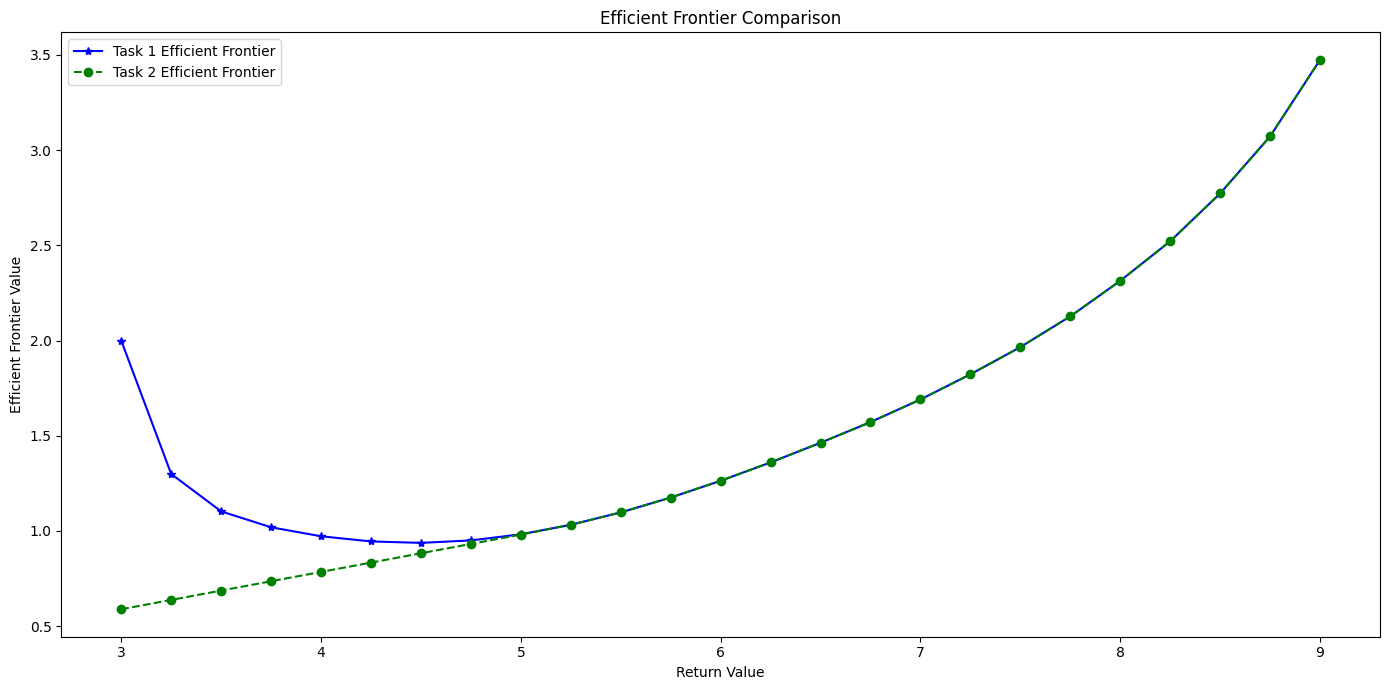

In [23]:
# Extracting Task 1 and Task 2 results from the updated dataframe
task1_updated_frontier = efficient_frontier1[0]
task2_updated_frontier = efficient_frontier2[0]

# Generate index values for plotting, assuming equal length for all lists
index_values = range(len(task1_updated_frontier))

# Plotting the mean and sigma results for Task 1 and Task 2
plt.figure(figsize=(14, 7))


# Frontier results comparison
plt.plot(r_values, task1_updated_frontier, label='Task 1 Efficient Frontier', marker='*', linestyle='-',color='blue')
plt.plot(r_values, task2_updated_frontier, label='Task 2 Efficient Frontier', marker='o', linestyle='--', color='green')
plt.title('Efficient Frontier Comparison')
plt.xlabel('Return Value')
plt.ylabel('Efficient Frontier Value')
plt.legend()

plt.tight_layout()
plt.show()


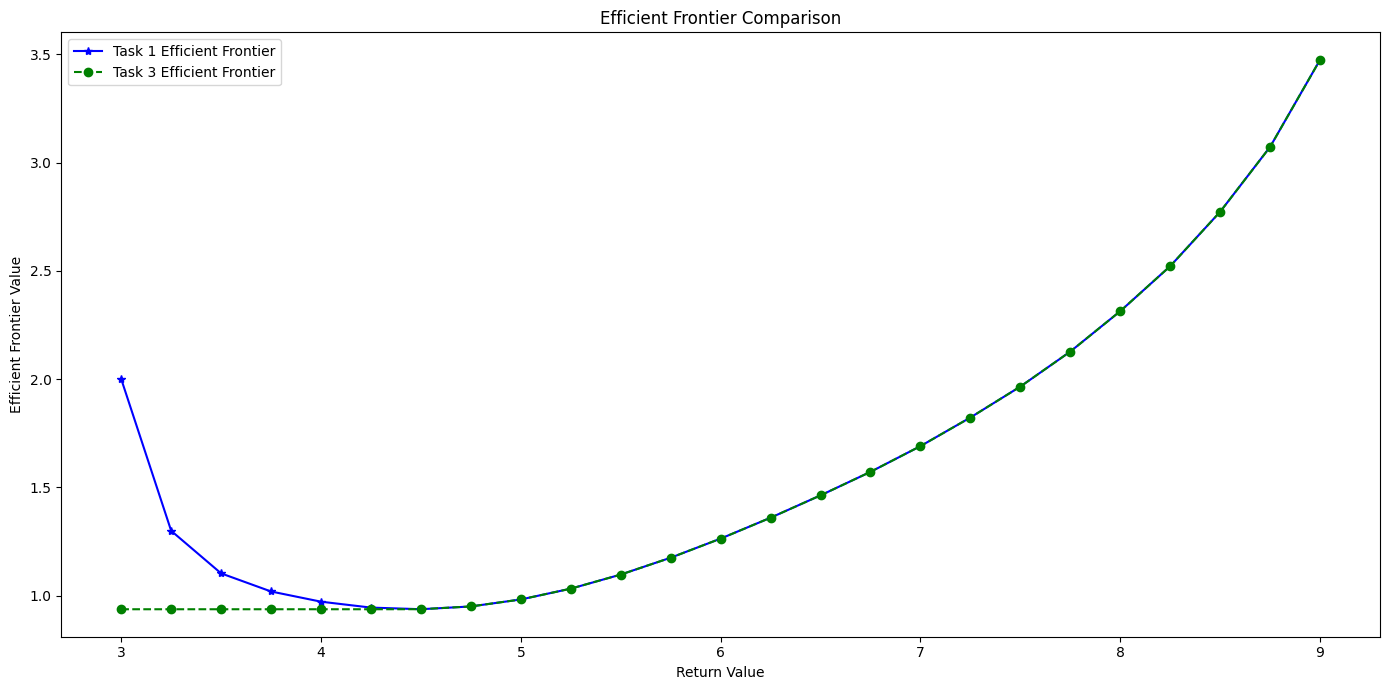

In [28]:
# Extracting Task 1 and Task 3 results from the updated dataframe
task1_updated_frontier = efficient_frontier1[0]
task3_updated_frontier = efficient_frontier3[0]

# Generate index values for plotting, assuming equal length for all lists
index_values = range(len(task1_updated_frontier))

# Plotting the mean and sigma results for Task 1 and Task 2
plt.figure(figsize=(14, 7))

# Frontier results comparison
plt.plot(r_values, task1_updated_frontier, label='Task 1 Efficient Frontier', marker='*', linestyle='-', color='blue')
plt.plot(r_values, task3_updated_frontier, label='Task 3 Efficient Frontier', marker='o', linestyle='--', color='green')
plt.title('Efficient Frontier Comparison')
plt.xlabel('Return Value')
plt.ylabel('Efficient Frontier Value')
plt.legend()

plt.tight_layout()
plt.show()


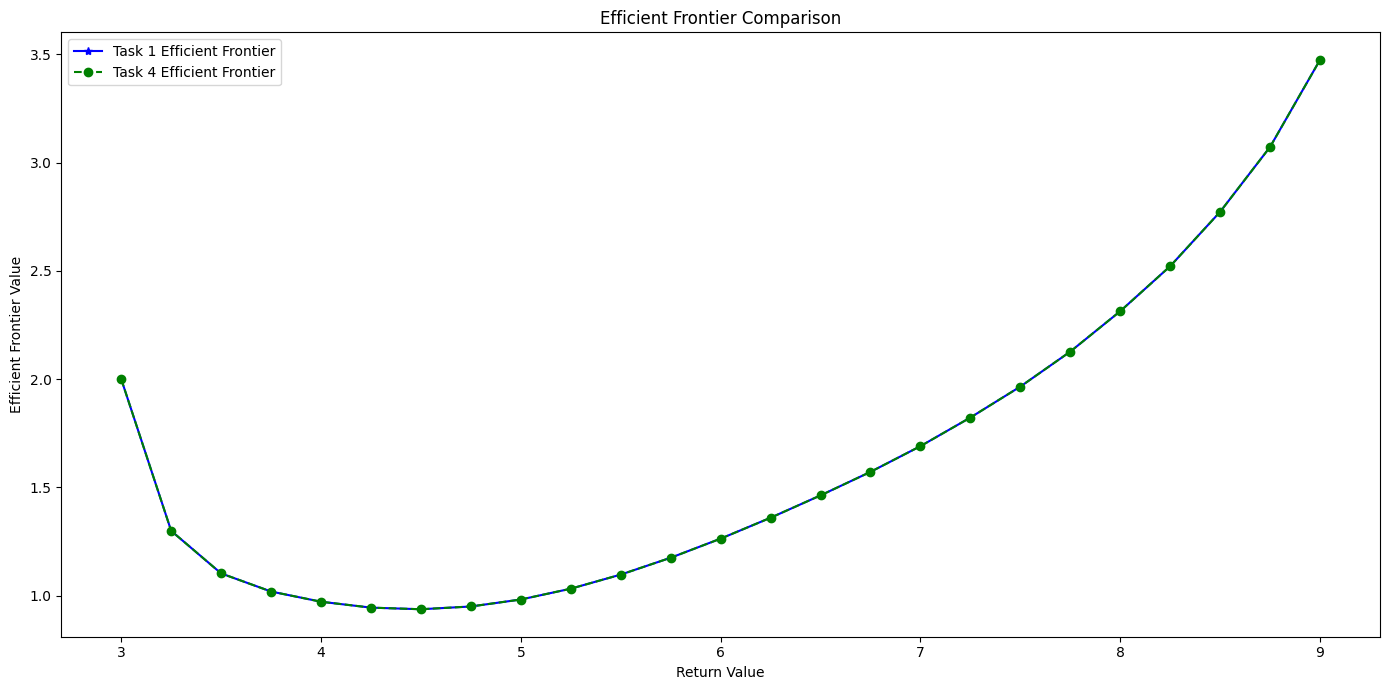

In [29]:
# Extracting Task 1 and Task 4 results from the updated dataframe
task1_updated_frontier = efficient_frontier1[0]
task4_updated_frontier = efficient_frontier4[0]

# Generate index values for plotting, assuming equal length for all lists
index_values = range(len(task1_updated_frontier))

# Plotting the mean and sigma results for Task 1 and Task 2
plt.figure(figsize=(14, 7))



# Frontier results comparison
plt.plot(r_values, task1_updated_frontier, label='Task 1 Efficient Frontier', marker='*', linestyle='-',color='blue')
plt.plot(r_values, task4_updated_frontier, label='Task 4 Efficient Frontier', marker='o', linestyle='--',color='green')
plt.title('Efficient Frontier Comparison')
plt.xlabel('Return Value')
plt.ylabel('Efficient Frontier Value')
plt.legend()

plt.tight_layout()
plt.show()


In [9]:
C

array([[  4.        ,  -2.99120523,   2.78664102,  -2.73344905,
          2.66208946,  -2.51657633,   2.69788917,  -2.40870318],
       [ -2.99120523,   8.9473087 ,  -6.25156138,   5.45087139,
         -4.97678494,   4.51655776,  -4.70746511,   4.1171003 ],
       [  2.78664102,  -6.25156138,  17.47207837, -11.42571187,
          9.27285961,  -7.88939417,   7.89395107,  -6.71219107],
       [ -2.73344905,   5.45087139, -11.42571187,  29.88697487,
        -18.1917148 ,  13.75786635, -12.90544956,  10.53450786],
       [  2.66208946,  -4.97678494,   9.27285961, -18.1917148 ,
         44.29200193, -25.12256746,  20.94756517, -16.03045836],
       [ -2.51657633,   4.51655776,  -7.88939417,  13.75786635,
        -25.12256746,  56.9984077 , -35.64458115,  24.24674156],
       [  2.69788917,  -4.70746511,   7.89395107, -12.90544956,
         20.94756517, -35.64458115,  89.16292345, -45.48889954],
       [ -2.40870318,   4.1171003 ,  -6.71219107,  10.53450786,
        -16.03045836,  24.2467415

In [10]:
r_values


array([3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25, 5.5 ,
       5.75, 6.  , 6.25, 6.5 , 6.75, 7.  , 7.25, 7.5 , 7.75, 8.  , 8.25,
       8.5 , 8.75, 9.  ])

In [11]:
task1_updated_frontier

array([2.        , 1.29904015, 1.10241639, 1.01877804, 0.9716545 ,
       0.94438579, 0.93690797, 0.94968865, 0.98193712, 1.03182966,
       1.09696142, 1.17480051, 1.26299964, 1.35954402, 1.46278219,
       1.57139561, 1.69016042, 1.8223657 , 1.96530088, 2.12693693,
       2.31356424, 2.52149873, 2.77272538, 3.07239244, 3.47465833])

In [12]:
task2_updated_frontier

array([0.58817053, 0.63718474, 0.68619895, 0.73521316, 0.78422738,
       0.83324159, 0.8822558 , 0.93127001, 0.98028422, 1.03182971,
       1.09696142, 1.17480052, 1.26299964, 1.35954402, 1.46278219,
       1.57139562, 1.69016042, 1.8223657 , 1.96530088, 2.12693692,
       2.31356425, 2.52149873, 2.77272538, 3.07239235, 3.47465833])

In [13]:
task3_updated_frontier

array([0.93673169, 0.93673169, 0.93673169, 0.93673169, 0.93673169,
       0.93673169, 0.93690798, 0.94968865, 0.98193712, 1.03182966,
       1.09696142, 1.17480051, 1.26299964, 1.35954402, 1.46278219,
       1.57139563, 1.69016043, 1.8223657 , 1.96530088, 2.12693691,
       2.31356426, 2.52149881, 2.77272539, 3.07239236, 3.47465833])

In [14]:
task4_updated_frontier

array([2.        , 1.29904015, 1.10241639, 1.01877804, 0.9716545 ,
       0.94438579, 0.93690797, 0.94968865, 0.98193712, 1.03182966,
       1.09696142, 1.17480051, 1.26299964, 1.35954402, 1.46278219,
       1.57139561, 1.69016042, 1.8223657 , 1.96530088, 2.12693693,
       2.31356424, 2.52149873, 2.77272538, 3.07239244, 3.47465833])